In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score,accuracy_score
from sklearn.model_selection import train_test_split,StratifiedKFold,RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")

In [9]:
df=pd.read_excel("C:/Users/User/Desktop/default of credit card clients.xls",header=1)
pd.set_option('display.max_columns', None)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [10]:
print(df.shape)

(30000, 25)


In [11]:
print(df.columns)

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


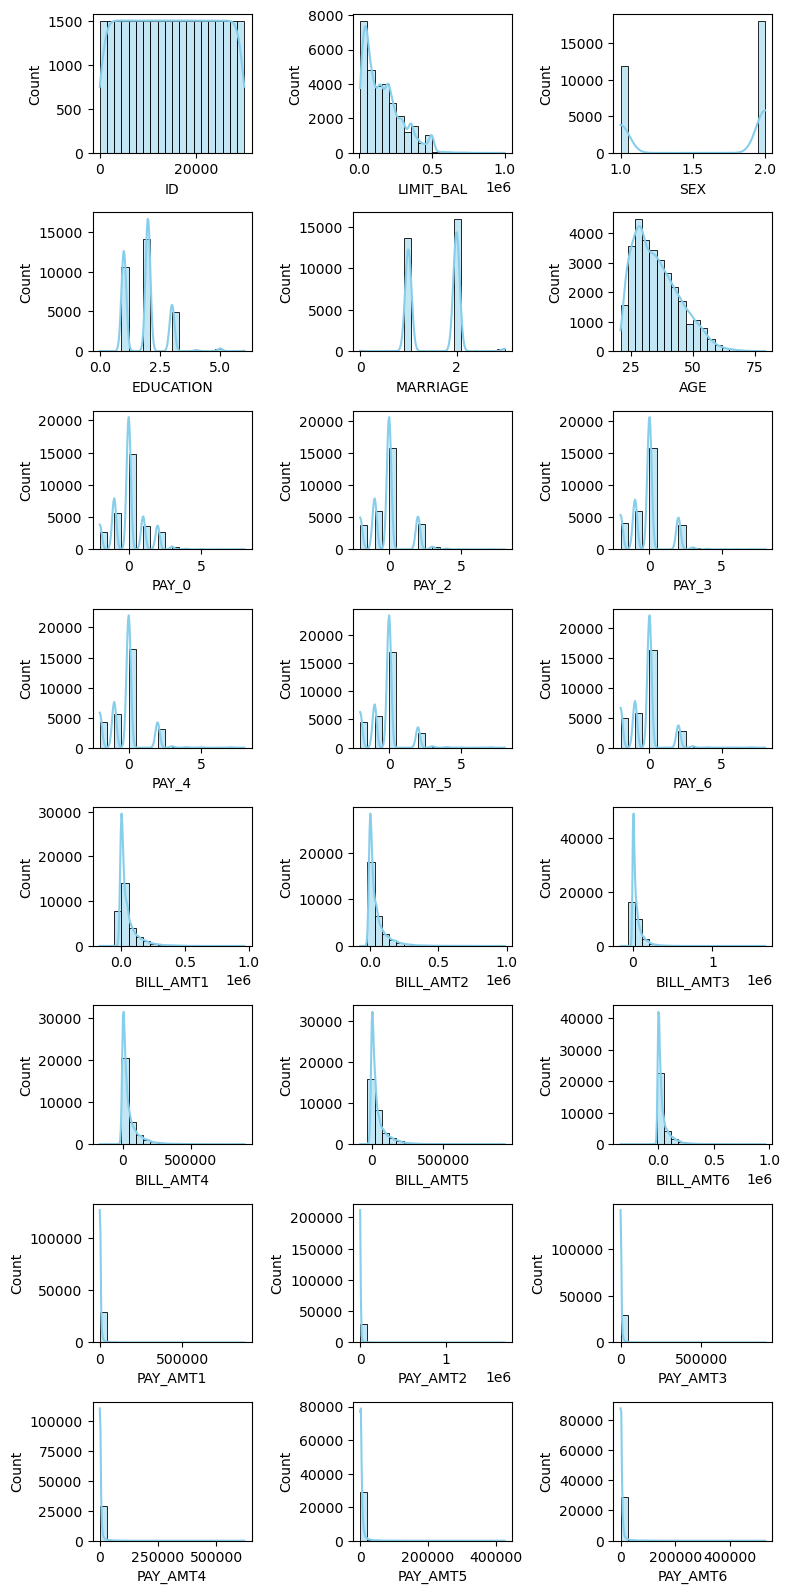

In [21]:
fig, axs = plt.subplots(8, 3, figsize=(8, 16))
axs = axs.flatten()

for ax, col in zip(axs, df.columns):
  sns.histplot(df[col], kde=True, bins=20, ax=ax, color='skyblue')
plt.tight_layout()
plt.show()

In [24]:
for col in df.columns:
    print(col,df[col].nunique())

ID 30000
LIMIT_BAL 81
SEX 2
EDUCATION 7
MARRIAGE 4
AGE 56
PAY_0 11
PAY_2 11
PAY_3 11
PAY_4 11
PAY_5 10
PAY_6 10
BILL_AMT1 22723
BILL_AMT2 22346
BILL_AMT3 22026
BILL_AMT4 21548
BILL_AMT5 21010
BILL_AMT6 20604
PAY_AMT1 7943
PAY_AMT2 7899
PAY_AMT3 7518
PAY_AMT4 6937
PAY_AMT5 6897
PAY_AMT6 6939
default payment next month 2


In [28]:
cat_col=[]
for col in df.columns:
    if df[col].nunique()<15:
        cat_col.append(col)
        print(col,df[col].unique())
print("Catergorical columns :",cat_col)

SEX [2 1]
EDUCATION [2 1 3 5 4 6 0]
MARRIAGE [1 2 3 0]
PAY_0 [ 2 -1  0 -2  1  3  4  8  7  5  6]
PAY_2 [ 2  0 -1 -2  3  5  7  4  1  6  8]
PAY_3 [-1  0  2 -2  3  4  6  7  1  5  8]
PAY_4 [-1  0 -2  2  3  4  5  7  6  1  8]
PAY_5 [-2  0 -1  2  3  5  4  7  8  6]
PAY_6 [-2  2  0 -1  3  6  4  7  8  5]
default payment next month [1 0]
Catergorical columns : ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'default payment next month']


In [29]:
for col in cat_col:
    df[col]=df[col].astype('category')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   ID                          30000 non-null  int64   
 1   LIMIT_BAL                   30000 non-null  int64   
 2   SEX                         30000 non-null  category
 3   EDUCATION                   30000 non-null  category
 4   MARRIAGE                    30000 non-null  category
 5   AGE                         30000 non-null  int64   
 6   PAY_0                       30000 non-null  category
 7   PAY_2                       30000 non-null  category
 8   PAY_3                       30000 non-null  category
 9   PAY_4                       30000 non-null  category
 10  PAY_5                       30000 non-null  category
 11  PAY_6                       30000 non-null  category
 12  BILL_AMT1                   30000 non-null  int64   
 13  BILL_AMT2       

### Missing Values Check & Duplicate check

In [31]:
df.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [33]:
df.duplicated().sum()

np.int64(0)

### Outliers & Skewness Checking

In [34]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [35]:
X = df.drop(columns=['ID','default payment next month'])
y = df['default payment next month']

In [36]:
num_cols=X.select_dtypes(include='number').columns.tolist()

In [38]:
print(num_cols)

['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


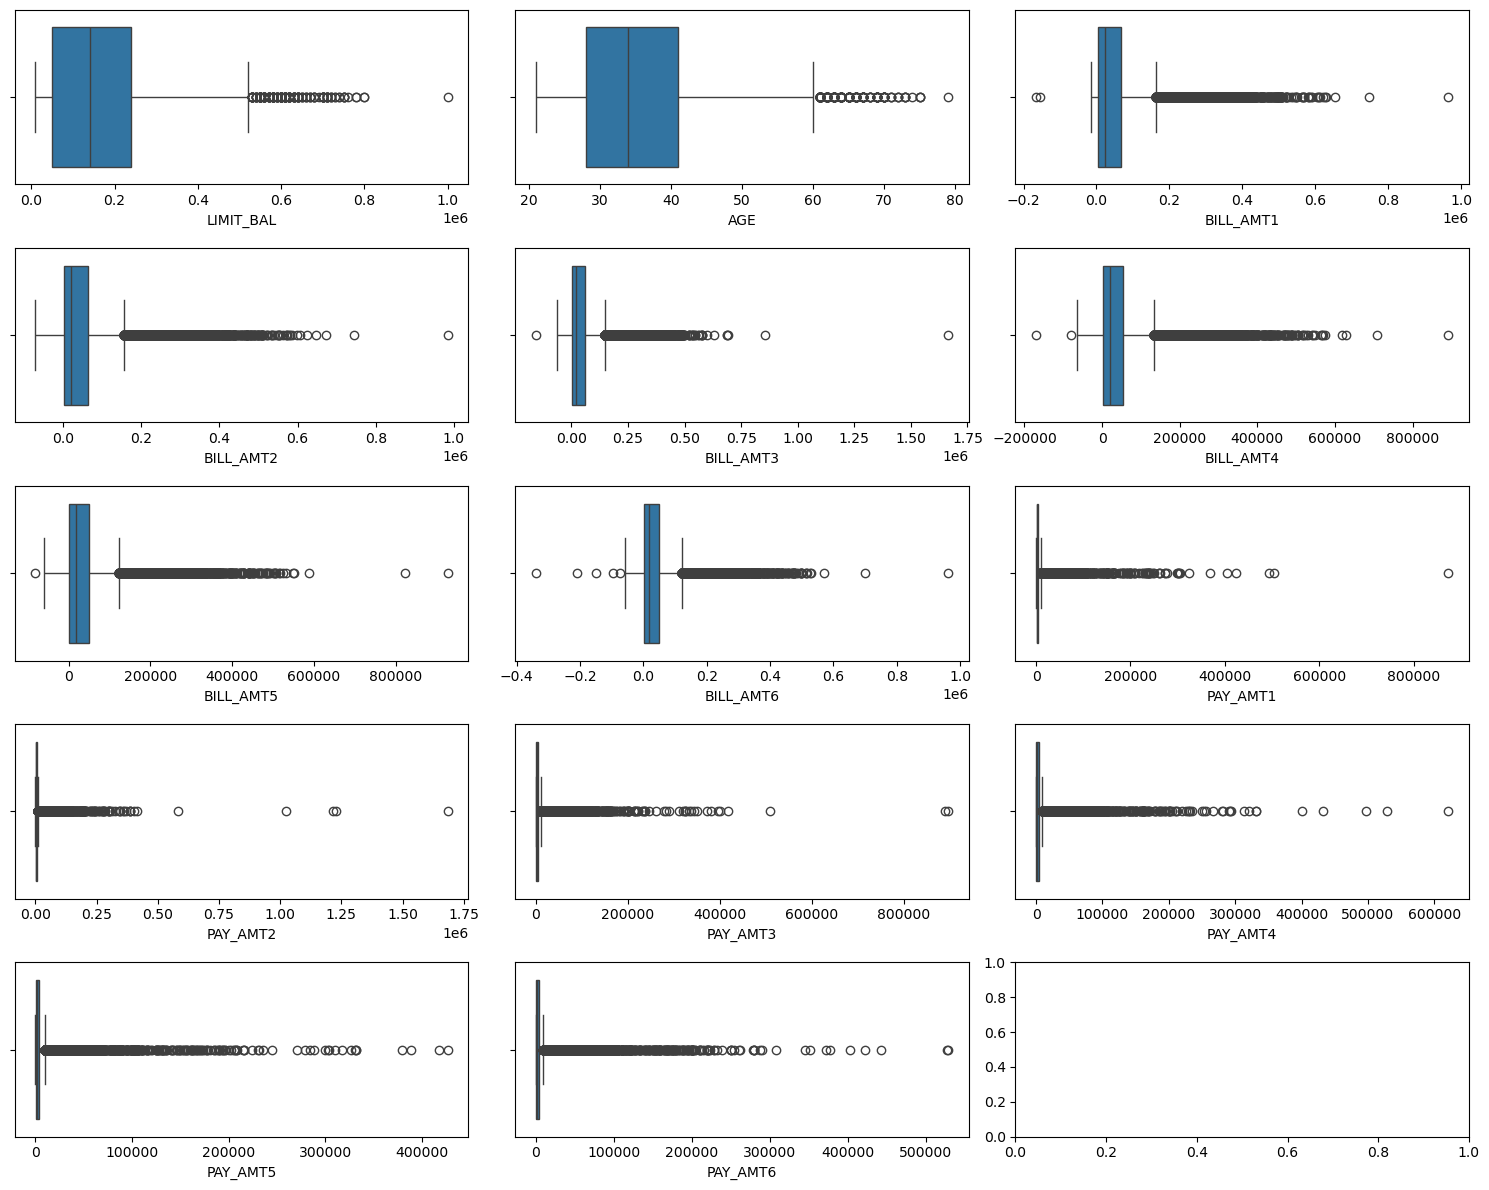

In [39]:
fig, axs = plt.subplots(5, 3, figsize=(15, 12))
axs = axs.flatten()

for ax, col in zip(axs, num_cols):
  sns.boxplot(x=col, data=X, ax=ax)

plt.tight_layout()
plt.show()

In [40]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
BILL_AMT1,30000.0,51223.330900,73635.860576,-165580.0,3558.75,22381.5,67091.00,964511.0
BILL_AMT2,30000.0,49179.075167,71173.768783,-69777.0,2984.75,21200.0,64006.25,983931.0
BILL_AMT3,30000.0,47013.154800,69349.387427,-157264.0,2666.25,20088.5,60164.75,1664089.0
BILL_AMT4,30000.0,43262.948967,64332.856134,-170000.0,2326.75,19052.0,54506.00,891586.0
BILL_AMT5,30000.0,40311.400967,60797.155770,-81334.0,1763.00,18104.5,50190.50,927171.0
BILL_AMT6,30000.0,38871.760400,59554.107537,-339603.0,1256.00,17071.0,49198.25,961664.0
PAY_AMT1,30000.0,5663.580500,16563.280354,0.0,1000.00,2100.0,5006.00,873552.0
PAY_AMT2,30000.0,5921.163500,23040.870402,0.0,833.00,2009.0,5000.00,1684259.0


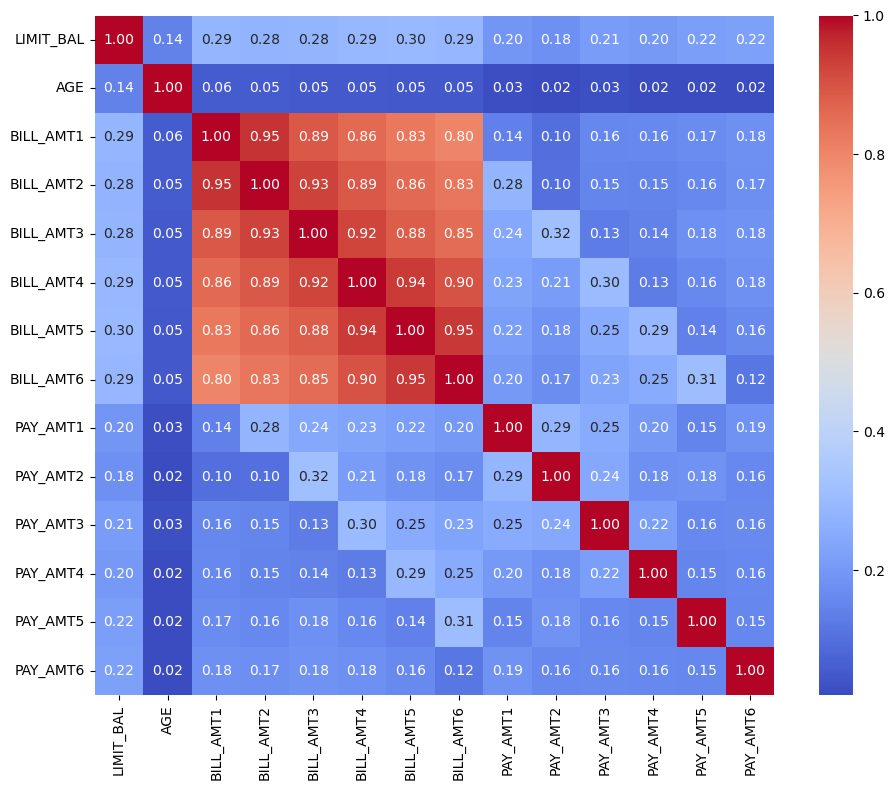

<Figure size 640x480 with 0 Axes>

In [75]:
corr=X[num_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,cmap='coolwarm',square=True,annot=True,fmt=".2f")
plt.tight_layout()
plt.show()
plt.savefig("correlation.png")

In [49]:
y.value_counts(normalize=True)

default payment next month
0    0.7788
1    0.2212
Name: proportion, dtype: float64

In [50]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)
print(X_train.shape,X_test.shape)
print(y_train.value_counts(normalize=True).to_dict())
print(y_test.value_counts(normalize=True).to_dict())

(24000, 23) (6000, 23)
{0: 0.7787916666666667, 1: 0.22120833333333334}
{0: 0.7788333333333334, 1: 0.22116666666666668}


In [53]:
pipe = Pipeline([("scaler",MinMaxScaler()),("model",XGBClassifier(use_label_encoder=False,eval_metric="logloss",random_state=42))])

In [57]:
param_distributions={
    "model__n_estimators": [50, 100, 200, 300],
    "model__learning_rate": [0.01, 0.05, 0.1, 0.2],
    "model__max_depth": [3, 4, 5, 6],
    "model__subsample": [0.7, 0.8, 1.0],
    "model__colsample_bytree": [0.7, 0.8, 1.0],
    "model__gamma": [0, 0.1, 0.2]
}

In [59]:
cv=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

### Randomized Search

In [60]:
rs=RandomizedSearchCV(estimator=pipe,param_distributions=param_distributions,n_iter=30,scoring="accuracy",cv=cv,n_jobs=-1,random_state=42,refit=True)

In [61]:
rs.fit(X_train,y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                             ('model',
                                              XGBClassifier(base_score=None,
                                                            booster=None,
                                                            callbacks=None,
                                                            colsample_bylevel=None,
                                                            colsample_bynode=None,
                                                            colsample_bytree=None,
                                                            device=None,
                                                            early_stopping_rounds=None,
                                                            enable_categorical=False,
                                                            eval_metric='logloss'...
                                                            multi_strategy=None,
                                                            n_estimators=None,
                                                            n_jobs=None,
                                                            num_parallel_tree=None, ...))]),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'model__colsample_bytree': [0.7, 0.8,
                                                                    1.0],
                                        'model__gamma': [0, 0.1, 0.2],
                                        'model__learning_rate': [0.01, 0.05,
                                                                 0.1, 0.2],
                                        'model__max_depth': [3, 4, 5, 6],
                                        'model__n_estimators': [50, 100, 200,
                                                                300],
                                        'model__subsample': [0.7, 0.8, 1.0]},
                   random_state=42, scoring='accuracy')

In [62]:
rs.best_score_

np.float64(0.8230833333333333)

In [63]:
rs.best_params_

{'model__subsample': 0.8,
 'model__n_estimators': 50,
 'model__max_depth': 4,
 'model__learning_rate': 0.05,
 'model__gamma': 0.1,
 'model__colsample_bytree': 0.8}

In [71]:
y_pred=rs.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred,average="weighted")

In [72]:
y_pred_train = rs.predict(X_train)
acc_train = accuracy_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train,average="weighted")

In [73]:
print(f"Test accuracy score: {accuracy:.3f}")
print(f"Train accuracy score: {acc_train:.3f}\n")

print(f"*Test F1 weighted score*: {f1:.3f}")
print(f"Train F1 seighted score: {f1_train:.3f}")

Test accuracy score: 0.819
Train accuracy score: 0.825

*Test F1 weighted score*: 0.795
Train F1 seighted score: 0.802
